In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from lcls_beamline_toolbox.xraybeamline2d import beam1d as beam, optics1d as optics, beamline1d as beamline

### Beam parameters

In [26]:
# number of sampling points
N = 4096
# photon energy in eV
E0 = 8870

# parameter dictionary. z_source is in LCLS coordinates (20 meters upstream of undulator exit)
beam_params = {
    'photonEnergy': E0,
    'N': N,
    'sigma_x': 23e-6,
    'sigma_y': 23e-6,
    'rangeFactor': 10,
    'scaleFactor': 10,
    'z_source': 650-26
}

### Define beamline

In [45]:
# initialize the beam

f= .48
b1 = beam.Beam(beam_params=beam_params)

s3 = optics.Slit('s3', z=789.9, x_width=150e-6, y_width=150e-6)

im_us = optics.PPM('im_us', z=785.1, FOV=1e-3)

crl0 = optics.CRL('crl0', z=790, f=f, diameter=300e-6, orientation=0, E0=E0)
crl1 = optics.CRL('crl1', z=790, f=f, diameter=300e-6, orientation=1, E0=E0)

im_ds = optics.PPM('im_ds', z=790.01, FOV=1e-3)

s_air = optics.Slit('s_air', z=791.9, x_width=20e-6, y_width=20e-6)

focus = optics.PPM('focus', z=crl0.z+f+3e-3, FOV=40e-6)

detector = optics.PPM('detector', z=focus.z+4, FOV=1e-3)



devices = [s3,im_us,crl0,crl1,im_ds,focus, detector]

# initialize beamline
XPP_beamline = beamline.Beamline(devices)

FWHM in x: 38.3817560828058 microns
FWHM in y: 38.3817560828058 microns
FWHM Divergence (x): 2.3 μrad
FWHM Divergence (y): 2.3 μrad
11.889881672006483
11.889881672006483
x is focused
y is focused


### Propagation through monochromator at central photon energy

In [46]:
print(crl0.roc)
# print(1/(1/50+1/50+1/100+1/200+1/2000))
print(50/12)

crlTest = optics.CRL('crlTest', z=790, roc=1/(12/50)*1e-6, diameter=300e-6, orientation=1, E0=E0)
print(crlTest.f)

1/(1/200+1/.48)

4.159493008648294e-06
4.166666666666667
0.48082783066149154


0.4788507581803671

FWHM in x: 368.7291399486043 microns
FWHM in y: 368.7291399486043 microns
FWHM Divergence (x): 2.3 μrad
FWHM Divergence (y): 2.3 μrad
11.889881672006483
11.889881672006483
x is focused
y is focused
im_us
zx: 161.100000
zy: 161.100000
azimuth 0.00 mrad
drift1
global_x 0.00
global_y 0.00
x intersect: 0.0000e+00
component x: 0.0000e+00
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 341565115.54 microns
zRy: 341565115.54 microns
remaining distance: 4800000.00 microns
goal for zx: 165900000.00 microns
current zx: 161100000.00 microns
goal for zy: 165900000.00 microns
current zy: 161100000.00 microns
zx: 165.900000
zy: 165.900000
azimuth 0.00 mrad
s3
zx: 165.900000
zy: 165.900000
azimuth 0.00 mrad
drift2
global_x 0.00
global_y 0.00
x intersect: 0.0000e+00
component x: 0.0000e+00
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 341565115.54 microns
zRy: 341565115.54 microns
remaining distance: 100000.00 microns
goal for zx: 166000000.00 microns
current zx

/Users/seaberg/beamline/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


<IPython.core.display.Javascript object>


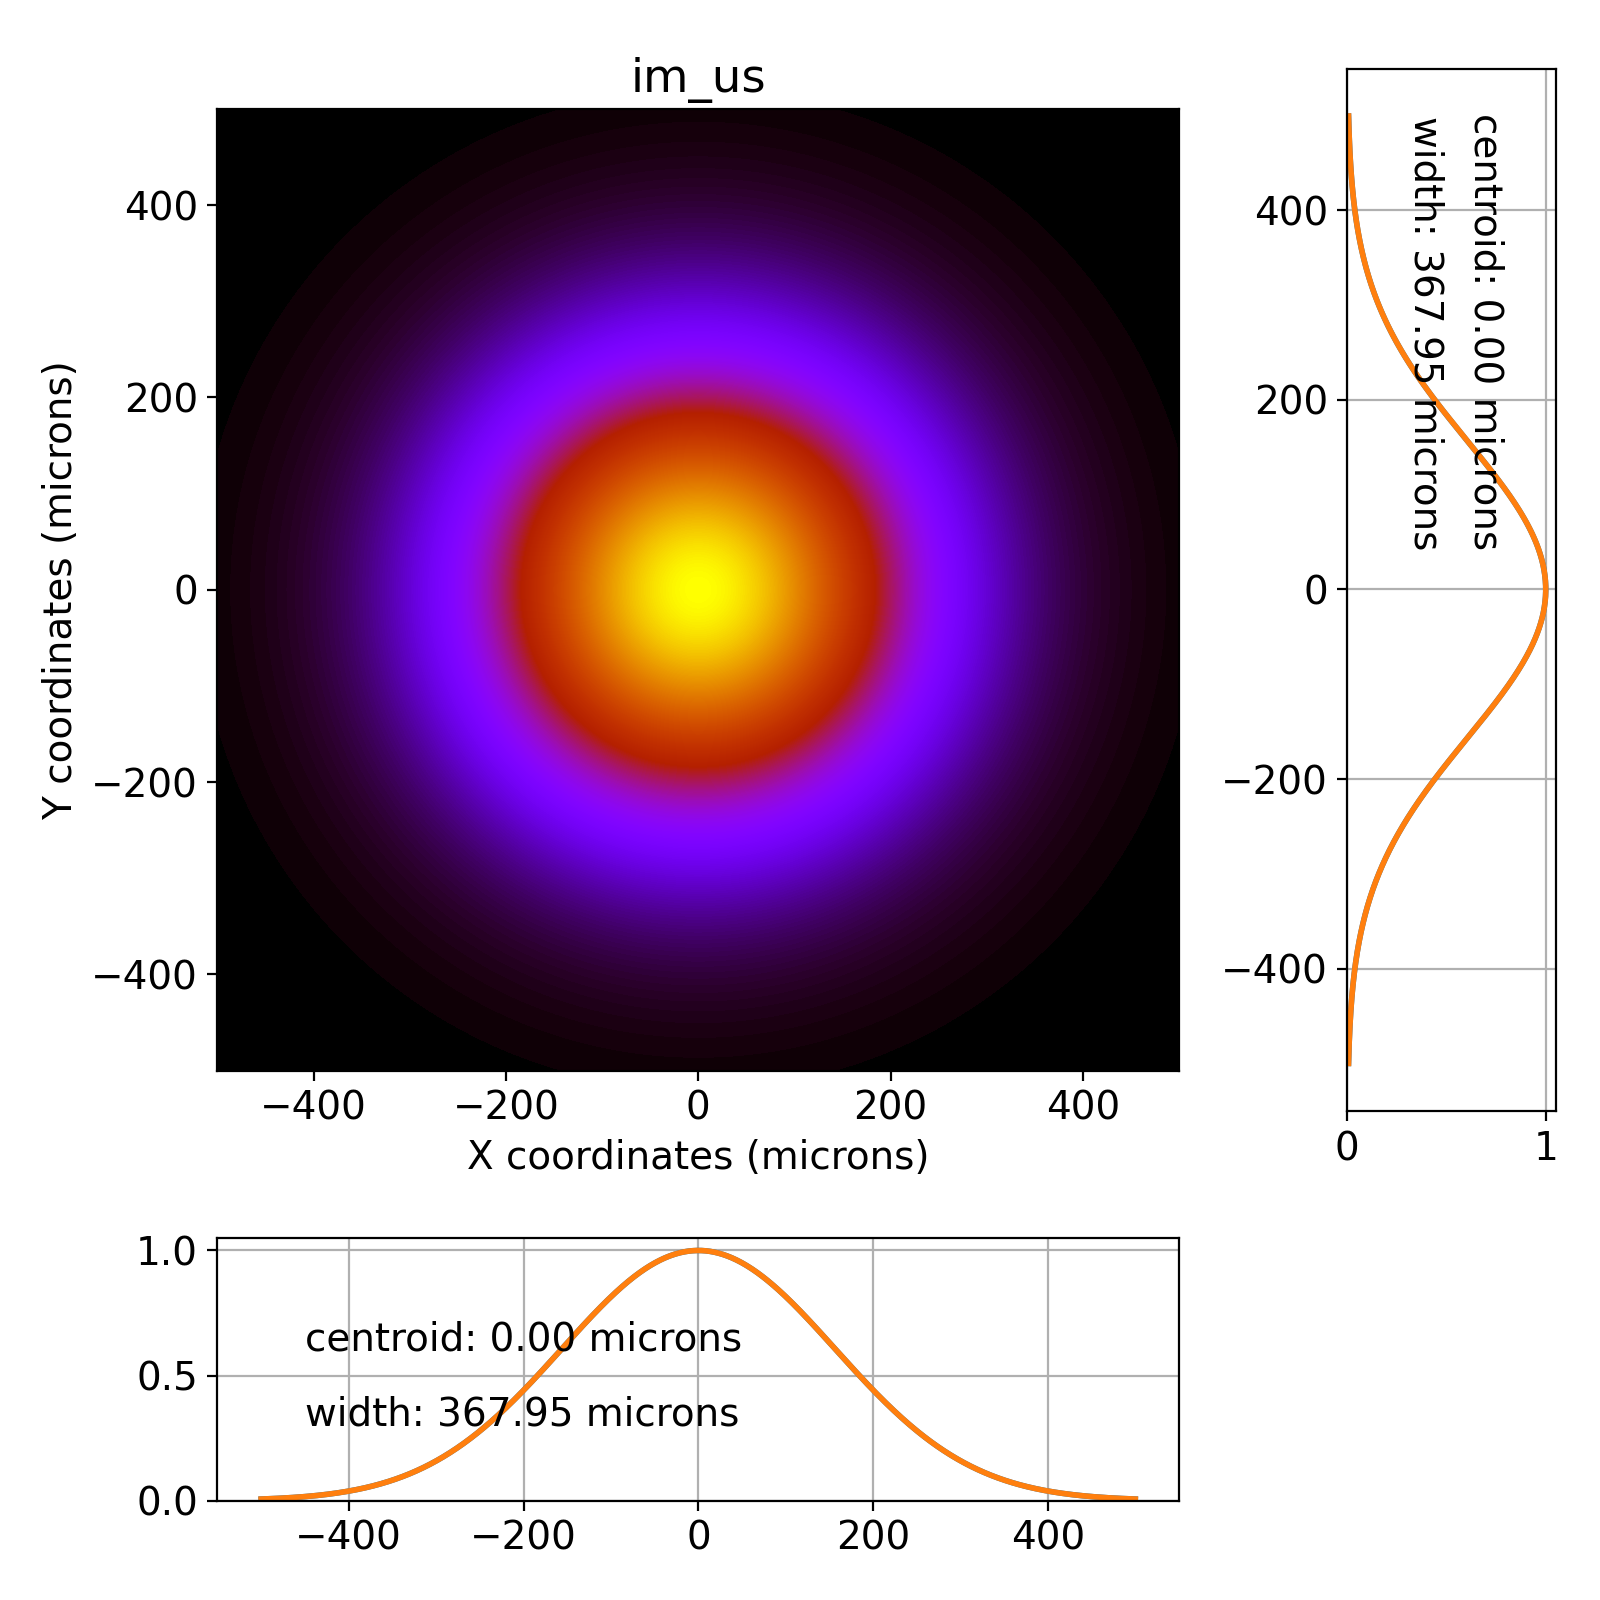

<IPython.core.display.Javascript object>


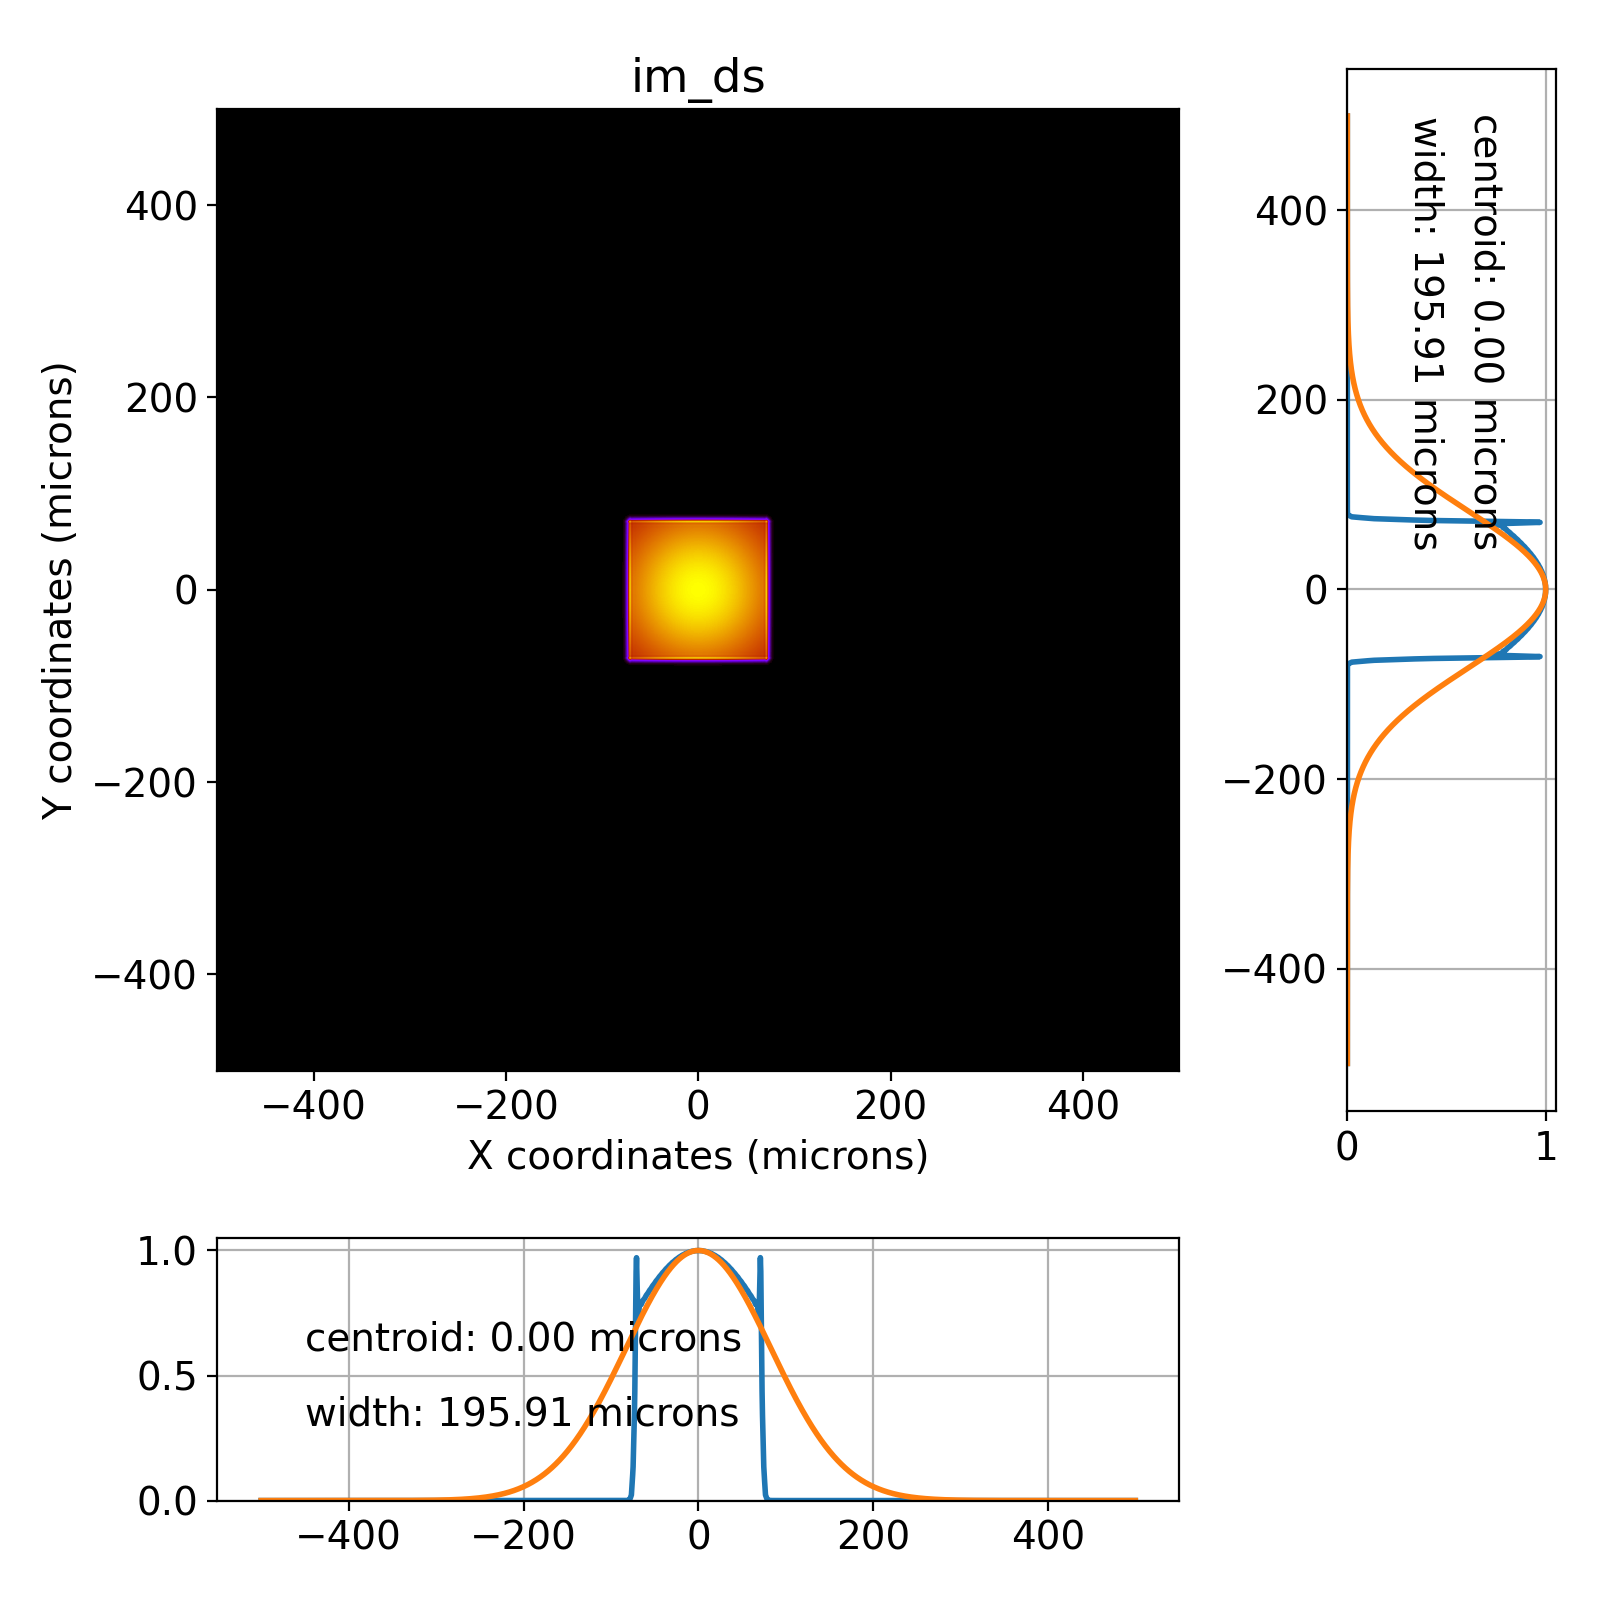

<IPython.core.display.Javascript object>


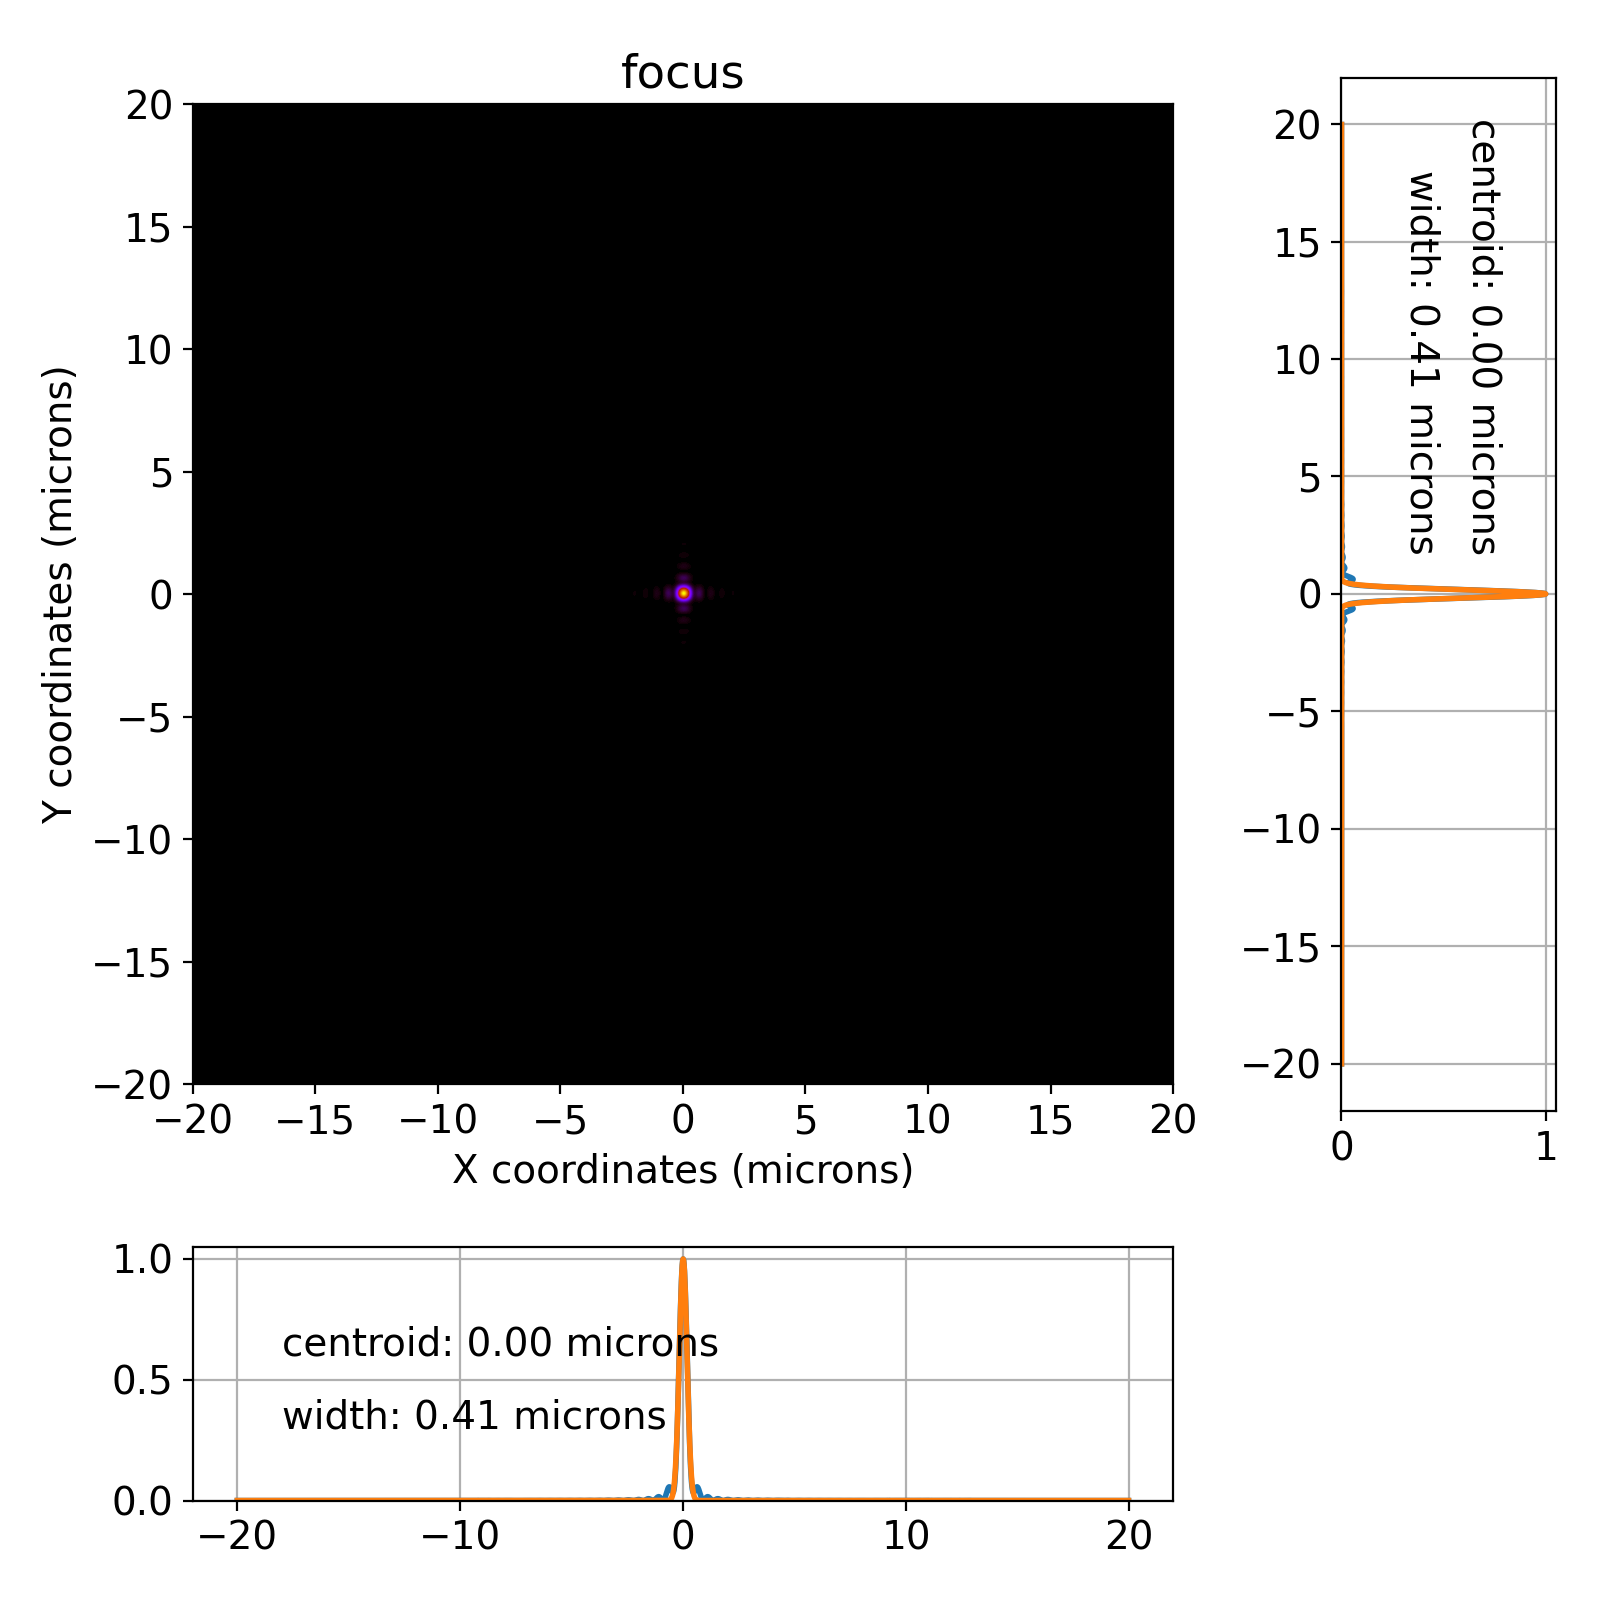

<IPython.core.display.Javascript object>


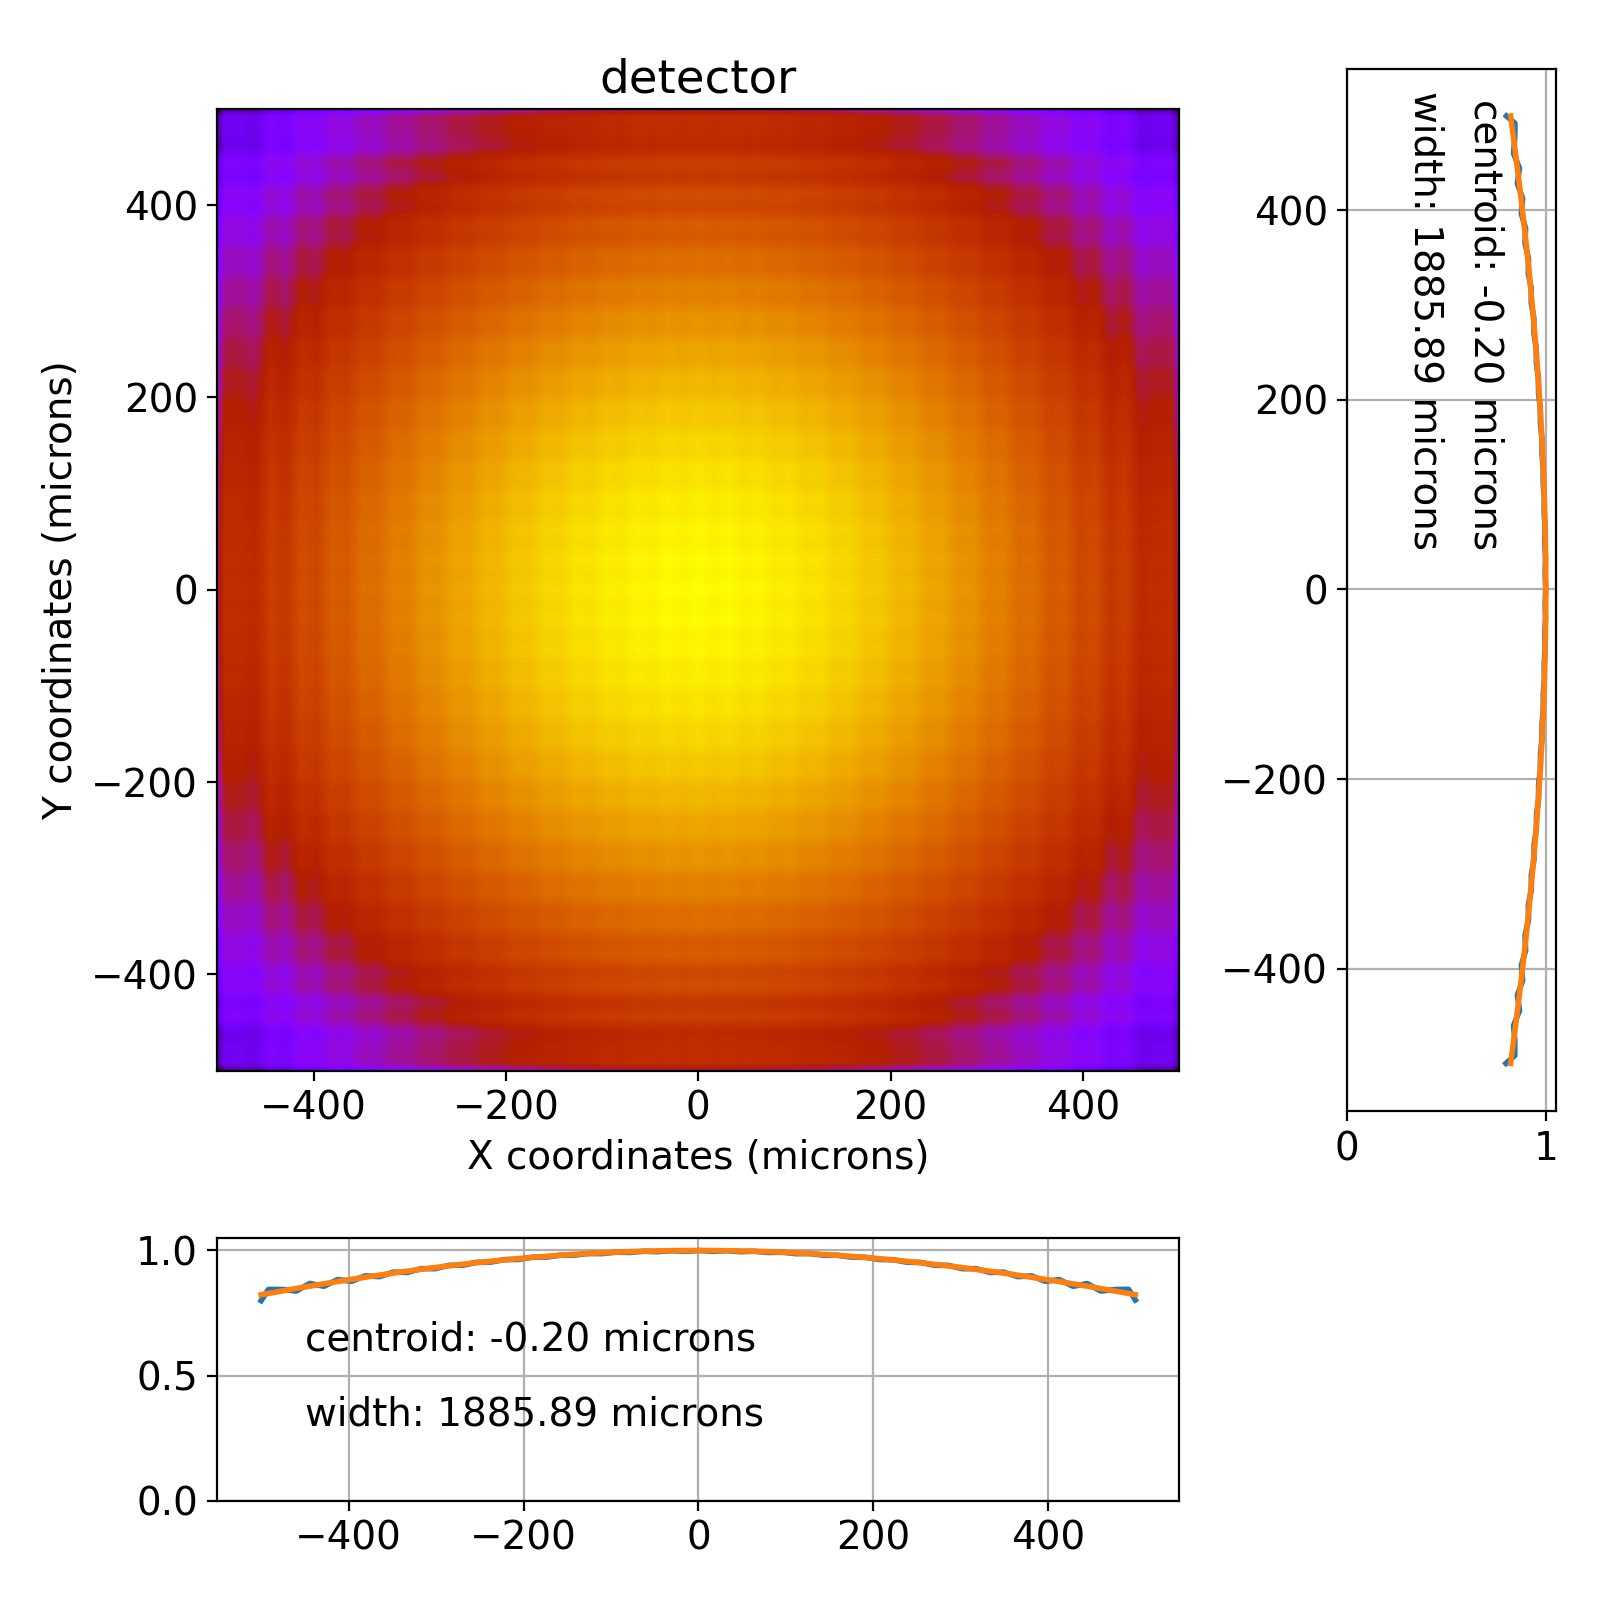

In [47]:
fig_path = '/Users/seaberg/OneDrive - SLAC National Accelerator Laboratory/Run 18 Experiments/LW09/figures/'

# propagate
b2 = XPP_beamline.propagate_beamline(b1)

# view beam at various locations
XPP_beamline.im_us.view_beam()
XPP_beamline.im_ds.view_beam()
XPP_beamline.focus.view_beam()
# plt.savefig(fig_path+'focus_2m_100micron.png')
XPP_beamline.detector.view_beam()
# mono_beamline.im2.view_beam()

<IPython.core.display.Javascript object>


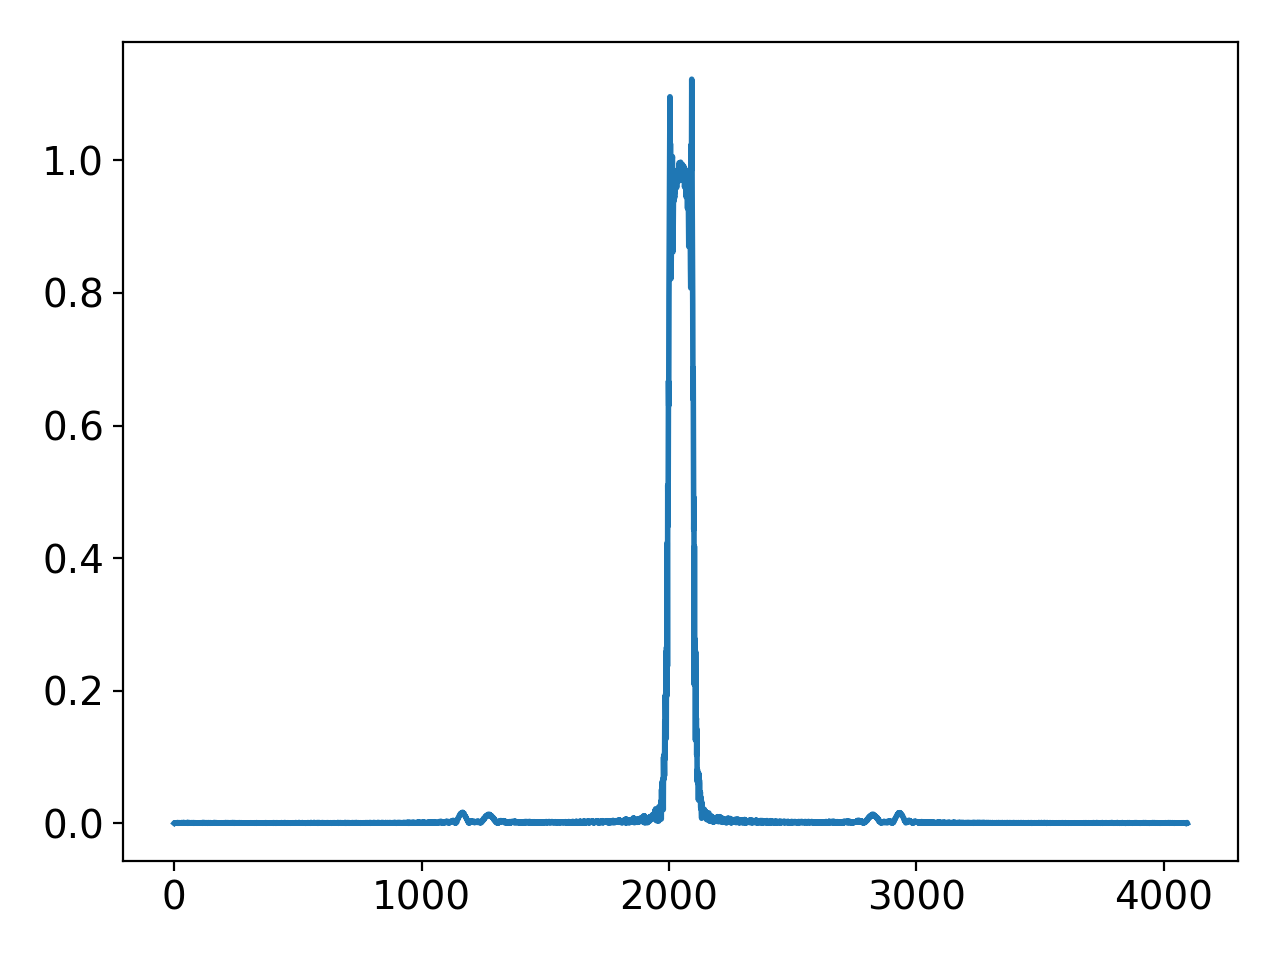

In [12]:
plt.figure()
plt.plot(np.abs(b2.wavex))

In [48]:
%%capture capt


wx_slit = np.zeros(100)
wy = np.zeros(100)
lineouts = np.zeros((512,100))

optics.PPM('focus', z=crl0.z+f+.024, FOV=40e-6)


IP_list = []
for i in range(100):
    IP_temp = optics.PPM('IP%d' % i, FOV=40e-6, z=crl0.z+f+ - .05 + i*.004/4, N=512)
    IP_list.append(IP_temp)

xppArray = [im_us,s3,crl0,crl1,im_ds, detector]
xppArray = xppArray + IP_list

xpp = beamline.Beamline(xppArray)
xpp.propagate_beamline(b1)


for j in range(100):
    PPM_temp = getattr(xpp, 'IP%d' % j)
    lineout = PPM_temp.x_lineout
    lineout = lineout/np.sum(lineout)
    lineouts[:,j] = lineout
    wx_slit[j] = PPM_temp.wx
    wy[j] = PPM_temp.wy

# lineouts = lineouts/np.max(lineouts)

<IPython.core.display.Javascript object>


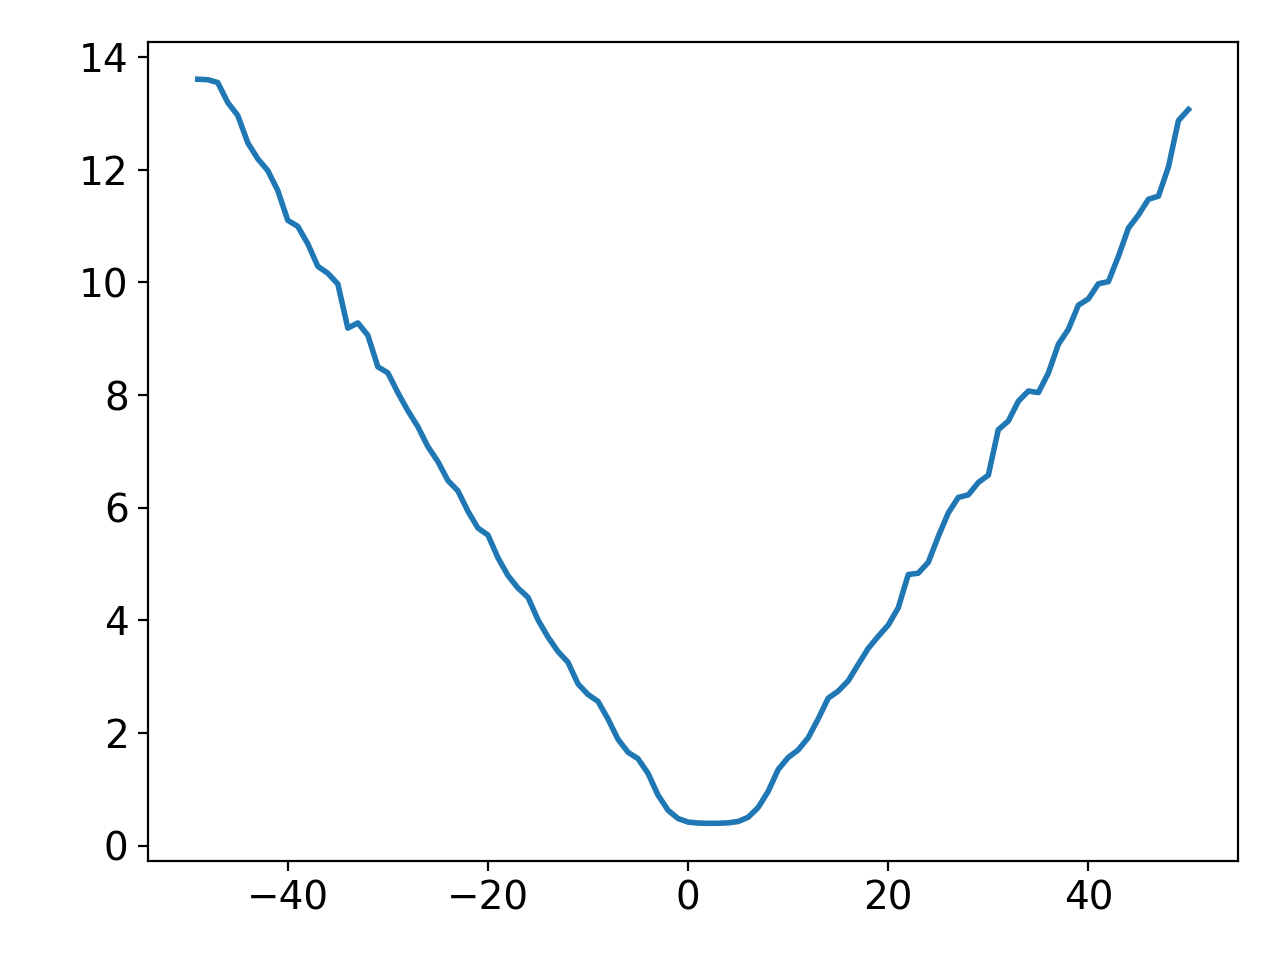

In [49]:
zPos = np.linspace(xpp.IP0.z, xpp.IP99.z, 100)

plt.figure()
plt.plot((zPos-xpp.IP49.z)*1e3,wx_slit*1e6)

In [15]:
%%capture capt


wx = np.zeros(100)
wy = np.zeros(100)
lineouts = np.zeros((512,100))

optics.PPM('focus', z=crl0.z+f+.024, FOV=40e-6)


IP_list = []
for i in range(100):
    IP_temp = optics.PPM('IP%d' % i, FOV=40e-6, z=crl0.z+f+ .024 - .2 + i*.004, N=512)
    IP_list.append(IP_temp)

xppArray = [im_us,crl0,crl1,im_ds, detector]
xppArray = xppArray + IP_list

xpp = beamline.Beamline(xppArray)
xpp.propagate_beamline(b1)


for j in range(100):
    PPM_temp = getattr(xpp, 'IP%d' % j)
    lineout = PPM_temp.x_lineout
    lineout = lineout/np.sum(lineout)
    lineouts[:,j] = lineout
    wx[j] = PPM_temp.wx
    wy[j] = PPM_temp.wy

# lineouts = lineouts/np.max(lineouts)

<IPython.core.display.Javascript object>


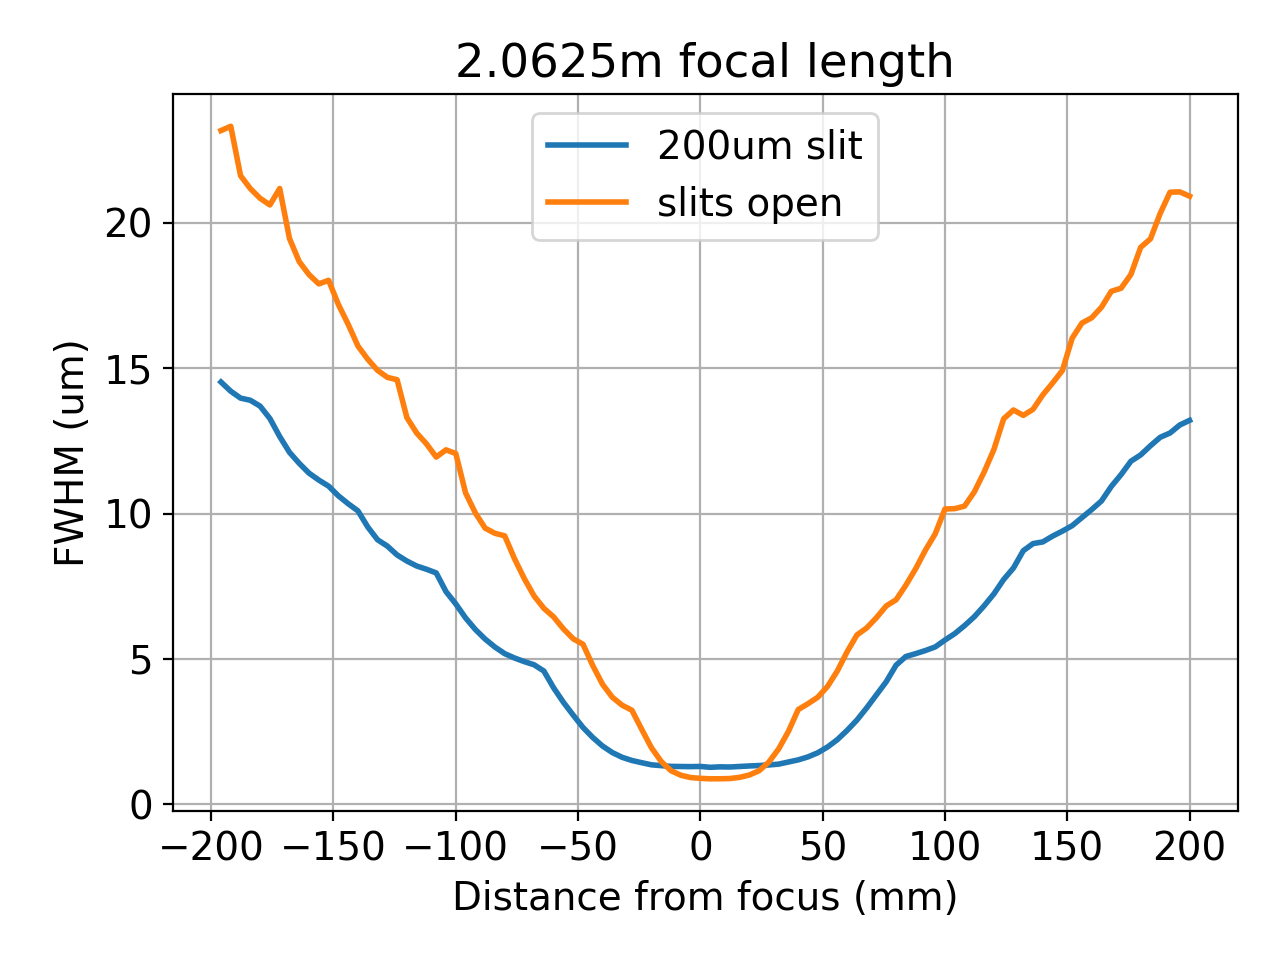

In [18]:
zPos = np.linspace(xpp.IP0.z, xpp.IP99.z, 100)

plt.figure()
plt.plot((zPos-xpp.IP49.z)*1e3,wx_slit*1e6,label='200um slit')
plt.plot((zPos-xpp.IP49.z)*1e3,wx*1e6,label='slits open')
plt.ylabel('FWHM (um)')
plt.xlabel('Distance from focus (mm)')
plt.title('2.0625m focal length')
plt.legend()
plt.grid()
# plt.savefig('/Users/seaberg/OneDrive - SLAC National Accelerator Laboratory/Run 18 Experiments/LW09/figures/through_focus.png')